<a href="https://colab.research.google.com/github/JamesAttwood1910/MobilePriceClassification/blob/main/PriceClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Basic packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
# Load data

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
train = pd.read_csv('/content/drive/MyDrive/PriceClassification/train.csv')

In [4]:
test = pd.read_csv('/content/drive/MyDrive/PriceClassification/test.csv')

In [5]:
train.shape

(2000, 21)

In [6]:
test.shape

(1000, 21)

## Data Exploration

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [21]:
def exploration(data = train):
  print()
  print('All variables:')
  print()
  print(data.columns)
  print()
  name = input("Which variable do you want to analyse? ")
  print()
  print(data[name].describe())
  print()
  missing = data[name].isna().sum()
  if missing > 0: 
    print('Contains missing values')
  elif missing == 0:
    print('No missing values')
  print()
  skew = data[name].skew()
  print('Skew: '+str(skew))
  skew_results =[]
  print()
  if ((skew > 0.5) and (skew <= 1)):
    print('Moderate skew positive')
    skew_results.append('Moderate skew positive')
  elif skew > 1:
    print('Extreme skew positive')
    skew_results.append('Extreme skew positive')
  elif ((skew >= -0.5) and (skew <= 0.5)):
    print('Normal distribution')
    skew_results.append('Normal distribution')
  elif ((skew < -0.5) and (skew >= -1)):
    print('Moderate skew negative')
    skew_results.append('Moderate skew negative')
  elif skew < -1: 
    print('Extreme skew negative')
    skew_results.append('Extreme skew negative')
  print()
  fig, axes = plt.subplots(2, 2, figsize=(18, 10))
  fig.suptitle('Exploratory Graphs: '+str(name))
  sns.kdeplot(ax=axes[0, 0], data = train, x = name)
  axes[0,0].set_title("Density Graph: "+str(name))
  sns.boxplot(ax=axes[0,1], data=train, x = name)
  axes[0,1].set_title("Box Plot: "+str(name))
  stats.probplot(train[name],plot=axes[1,0])
  axes[1,0].set_title("Q-Q Plot: "+str(name))
  fig.delaxes(axes[1,1])
  desc = train[name].describe()
  skew_df = pd.DataFrame([[skew_results, skew]], columns = [['Interpretation', name+str(' skew result')]])
  images_dir = '/content/drive/My Drive/PriceClassification/DataExploration'
  desc.to_csv(f"{images_dir}/{name}_describe.csv")
  skew_df.to_csv(f"{images_dir}/{name}_skew.csv")
  fig.savefig(f"{images_dir}/{name}_graphs.png")


All variables:

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Which variable do you want to analyse? battery_power

count    2000.000000
mean     1238.518500
std       439.418206
min       501.000000
25%       851.750000
50%      1226.000000
75%      1615.250000
max      1998.000000
Name: battery_power, dtype: float64

No missing values

Skew: 0.03189847179278164

Normal distribution



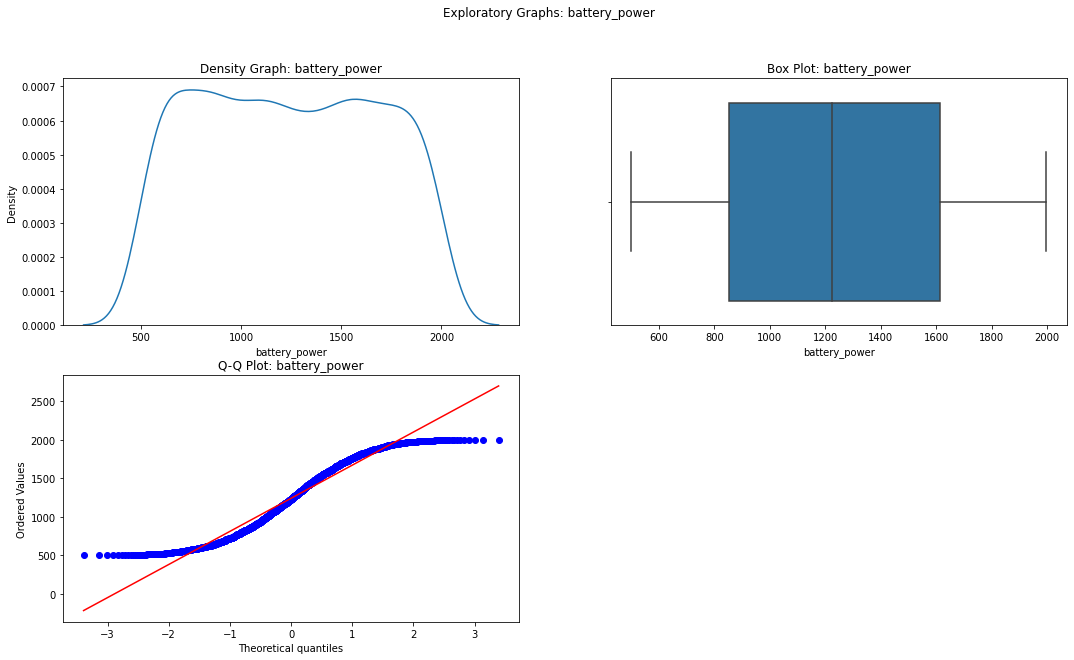

In [22]:
exploration()

In [ ]:
# Analyse - battery power

# No missing values. Close to a normal distribution with similar mean and median. 
# No outliers identified in the box plot. 


All variables:

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Which variable do you want to analyse? blue

count    2000.0000
mean        0.4950
std         0.5001
min         0.0000
25%         0.0000
50%         0.0000
75%         1.0000
max         1.0000
Name: blue, dtype: float64

No missing values

Skew: 0.020016015215014945

Normal distribution



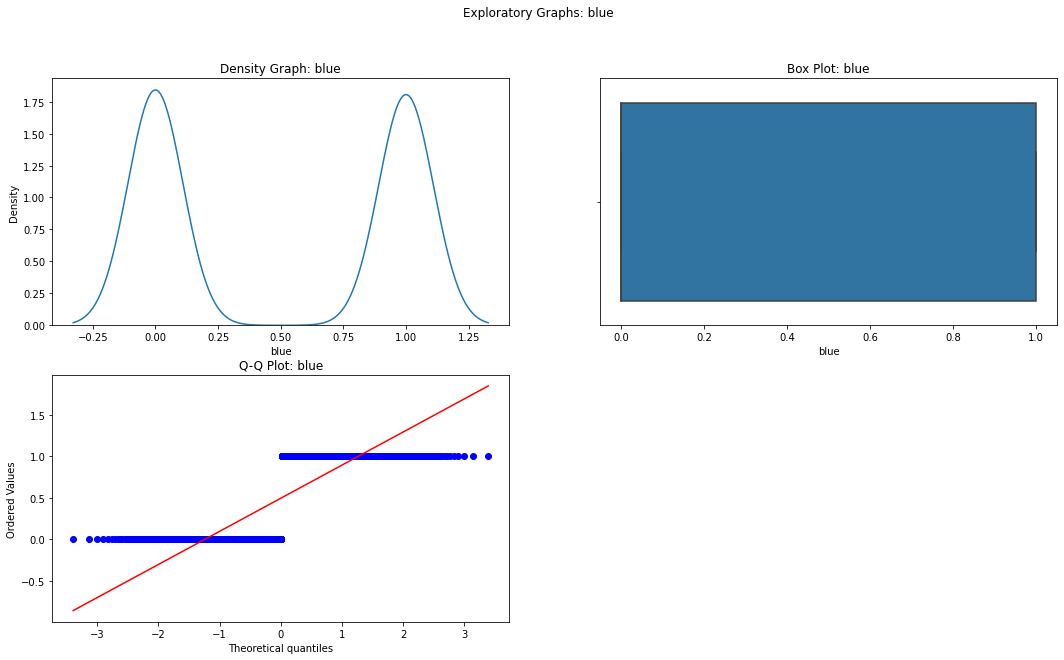

In [23]:
exploration()

In [ ]:
# Analyses - blue

# Binary variable which refers to the presence of bluetooth capabilities in the phone. 
# No missing values or outliers. 
# No transformation required. 


All variables:

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Which variable do you want to analyse? clock_speed

count    2000.000000
mean        1.522250
std         0.816004
min         0.500000
25%         0.700000
50%         1.500000
75%         2.200000
max         3.000000
Name: clock_speed, dtype: float64

No missing values

Skew: 0.1780841202790887

Normal distribution



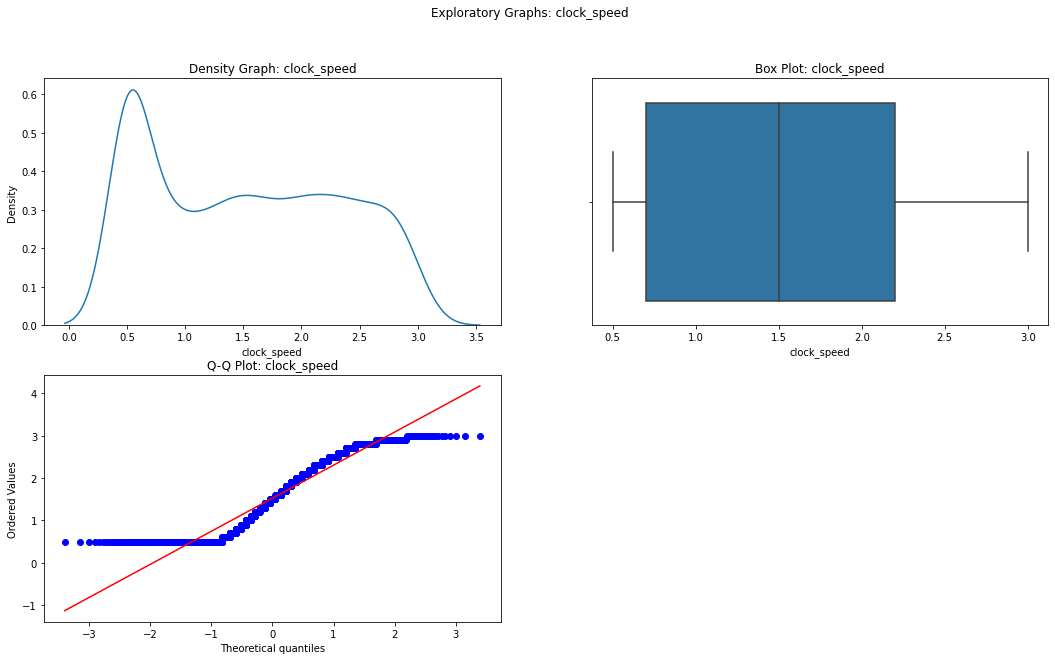

In [24]:
exploration()


All variables:

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Which variable do you want to analyse? dual_sim

count    2000.000000
mean        0.509500
std         0.500035
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: dual_sim, dtype: float64

No missing values

Skew: -0.03803539334775485

Normal distribution



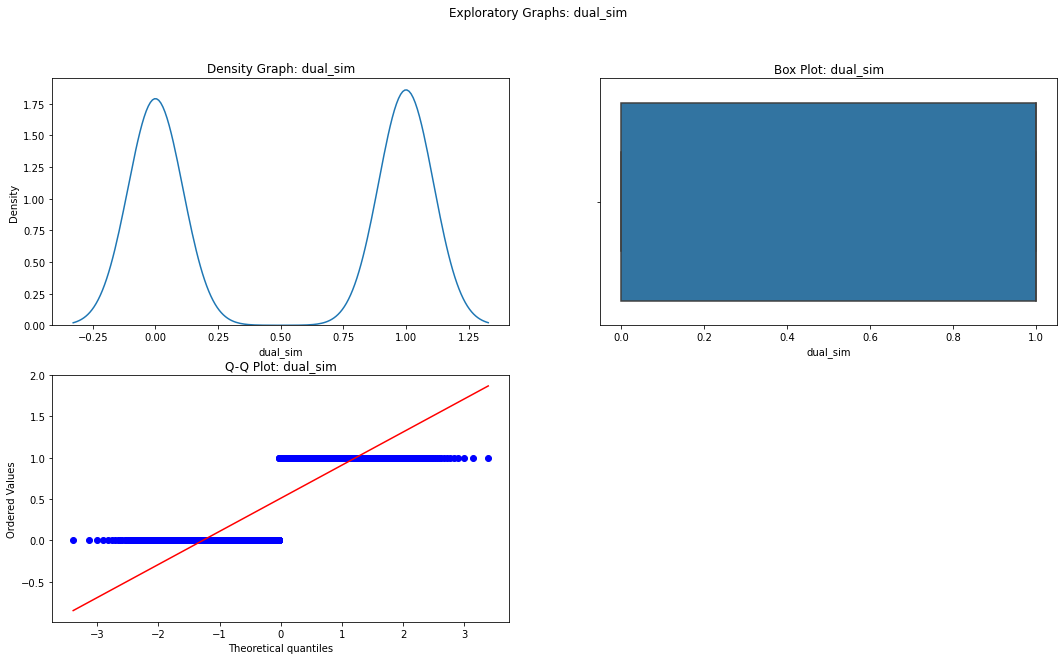

In [25]:
exploration()

In [ ]:
# Analyses - dual sim

# Binary variable which refers to the presence of dual sim capabilities in the phone. 
# No missing values or outliers. 
# No transformation required. 


All variables:

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Which variable do you want to analyse? fc

count    2000.000000
mean        4.309500
std         4.341444
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        19.000000
Name: fc, dtype: float64

No missing values

Skew: 1.0198114105315519

Extreme skew positive



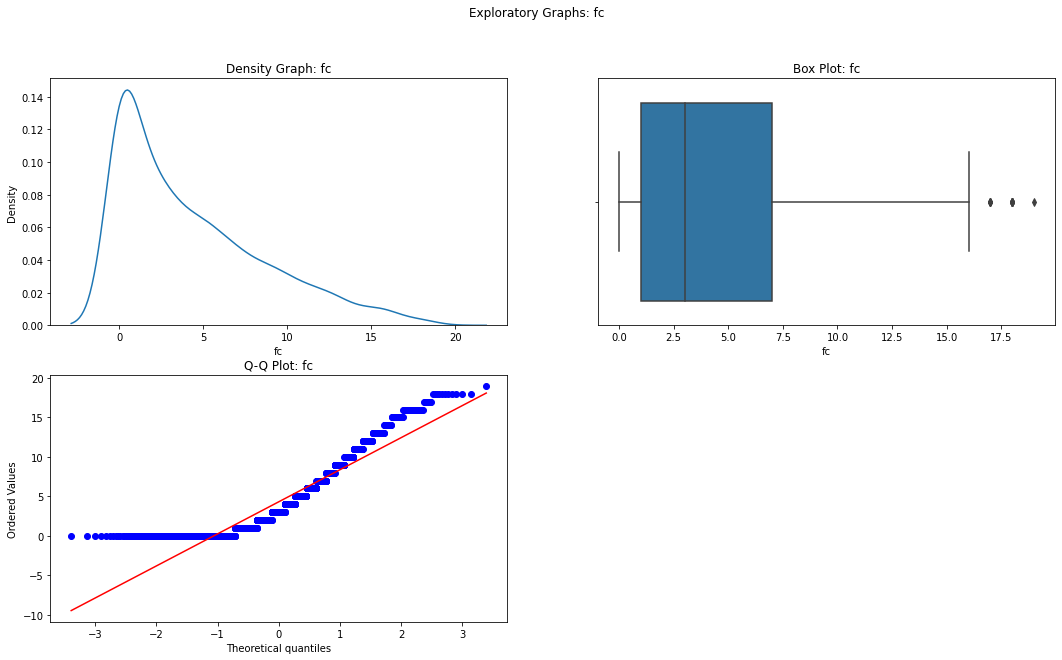

In [27]:
exploration()

In [ ]:
# Analyses - FC 

# Variable refers to number of megapixles in front camera. 

# Non normal distribution with Positive skew. Mean is bigger than median, with presence of outliers identified in the boxplot. 
# These outliers have caused the mean to increase. 
# variable may require transformation to achieve a more normal distribution. 


All variables:

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Which variable do you want to analyse? four_g

count    2000.000000
mean        0.521500
std         0.499662
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: four_g, dtype: float64

No missing values

Skew: -0.08614423907054716

Normal distribution



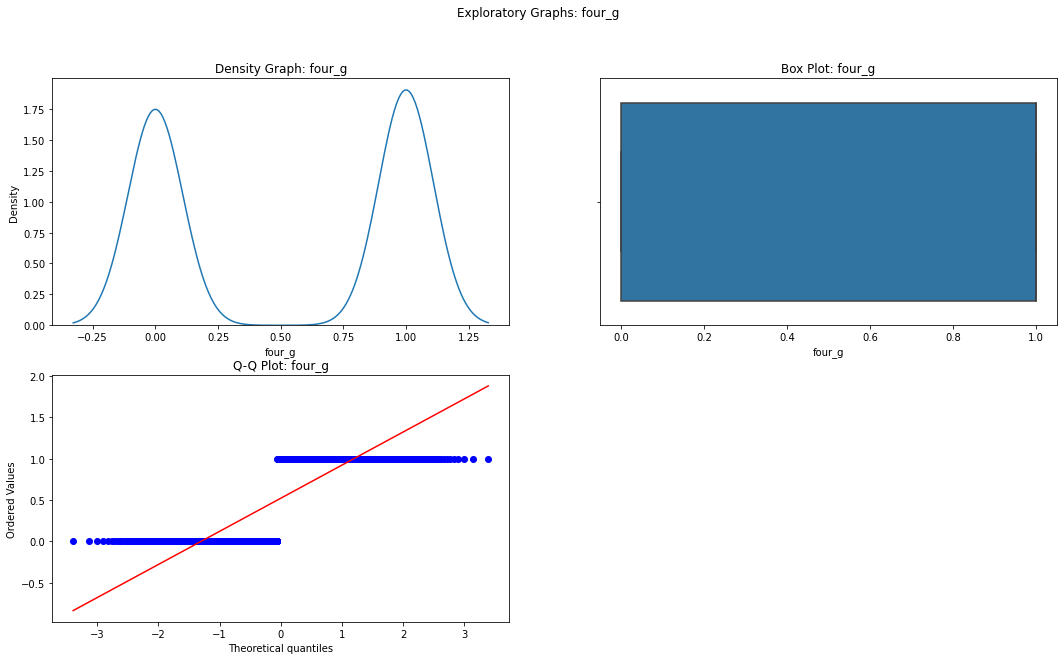

In [28]:
exploration()

In [ ]:
# Analyses - four g

# Binary variable which refers to the presence of four g capabilities in the phone. 
# No missing values or outliers. 
# No transformation required. 


All variables:

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Which variable do you want to analyse? int_memory

count    2000.000000
mean       32.046500
std        18.145715
min         2.000000
25%        16.000000
50%        32.000000
75%        48.000000
max        64.000000
Name: int_memory, dtype: float64

No missing values

Skew: 0.05788932785206039

Normal distribution



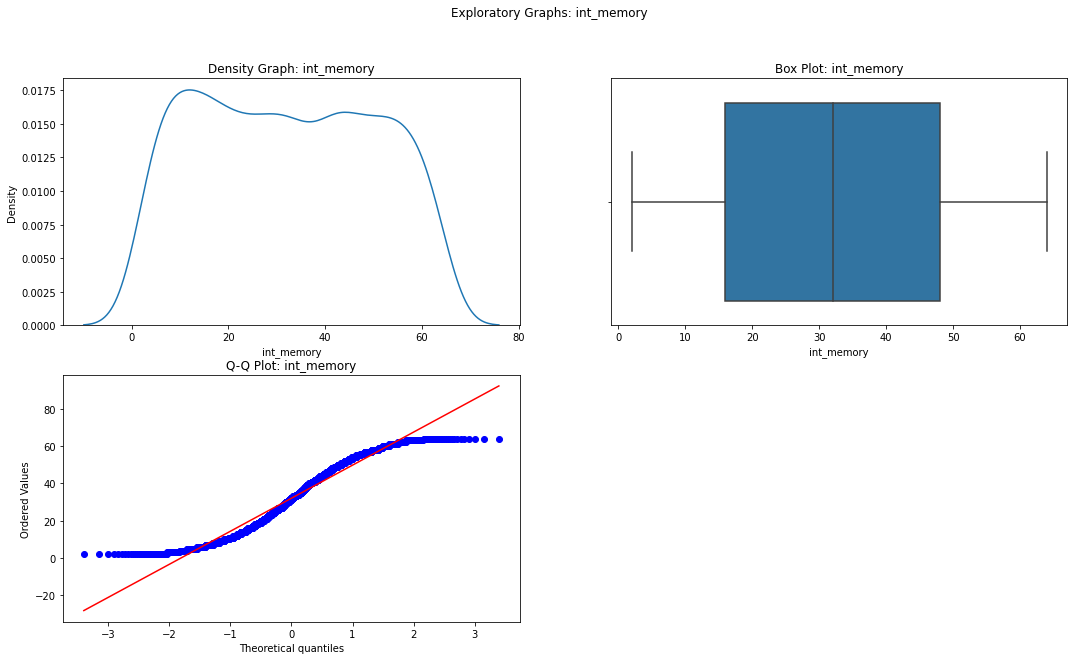

In [30]:
exploration()

In [ ]:
# Analyses - internal memory 

# No missing values 
# Close to a normal distribution
# No outliers detected. 


All variables:

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Which variable do you want to analyse? m_dep

count    2000.000000
mean        0.501750
std         0.288416
min         0.100000
25%         0.200000
50%         0.500000
75%         0.800000
max         1.000000
Name: m_dep, dtype: float64

No missing values

Skew: 0.08908200979245855

Normal distribution



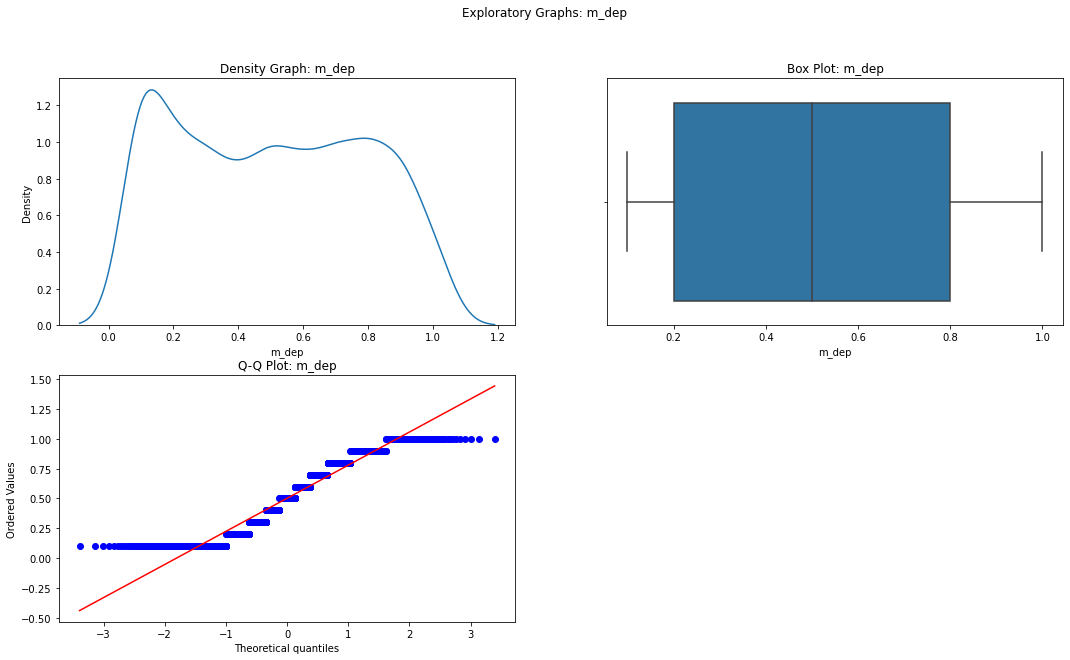

In [31]:
exploration()

In [ ]:
# Analyses - m_depth

# depth of mobile phone. 
# No missing values. 
# No outliers 
# close to a normal distribution


All variables:

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Which variable do you want to analyse? mobile_wt

count    2000.000000
mean      140.249000
std        35.399655
min        80.000000
25%       109.000000
50%       141.000000
75%       170.000000
max       200.000000
Name: mobile_wt, dtype: float64

No missing values

Skew: 0.006558157428692449

Normal distribution



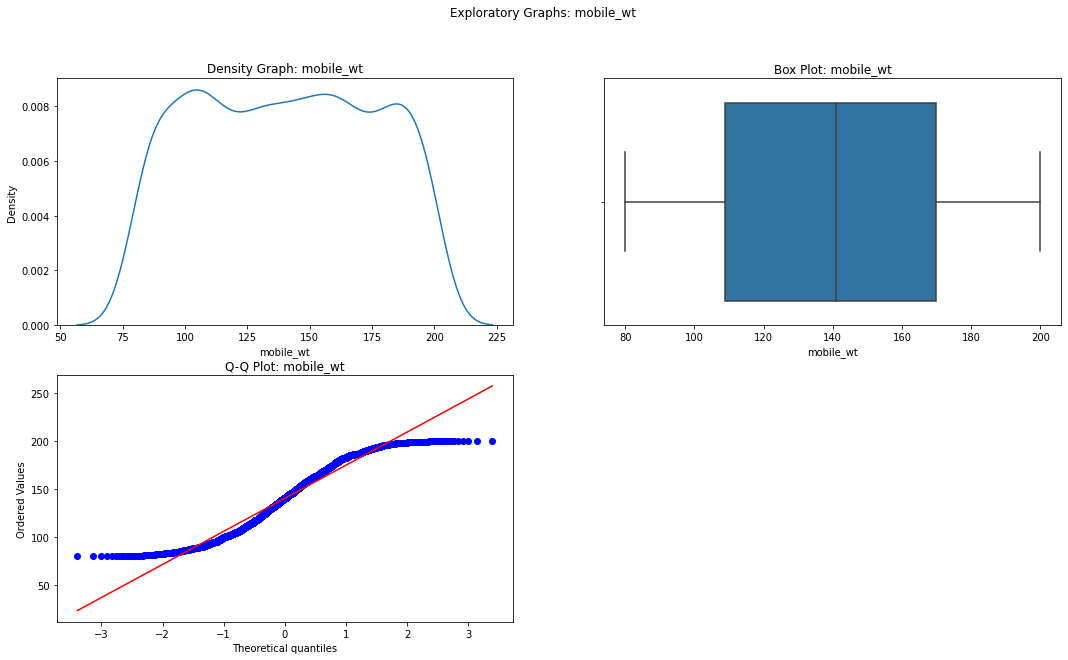

In [32]:
exploration()

In [ ]:
# Analyses - weight of phone

# No missing values. 
# No outliers 
# close to a normal distribution


All variables:

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Which variable do you want to analyse? n_cores

count    2000.000000
mean        4.520500
std         2.287837
min         1.000000
25%         3.000000
50%         4.000000
75%         7.000000
max         8.000000
Name: n_cores, dtype: float64

No missing values

Skew: 0.0036275083137803994

Normal distribution



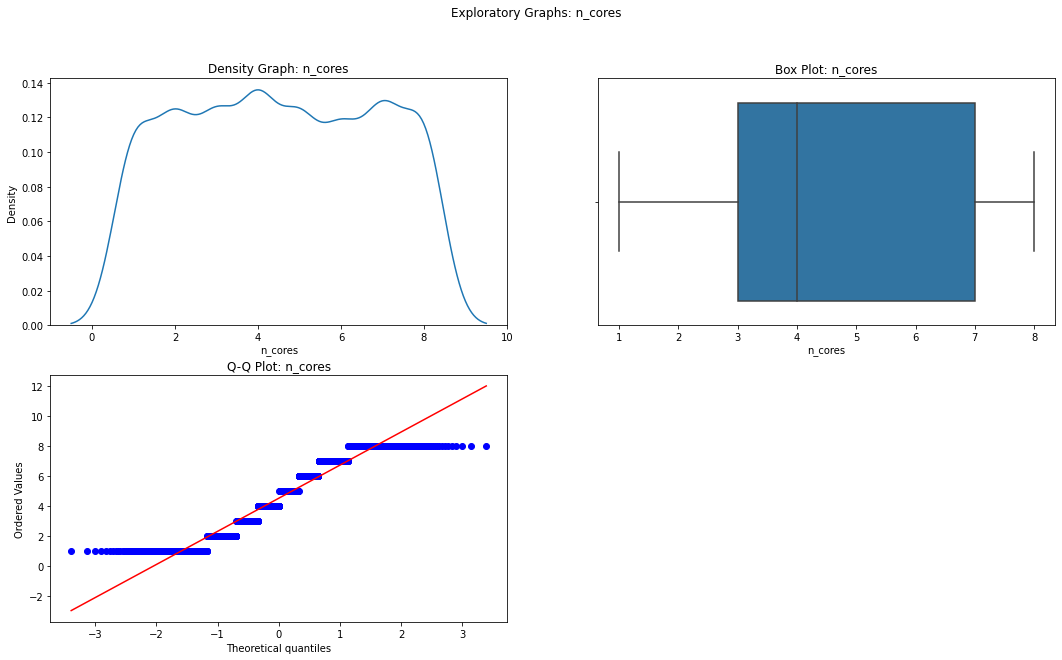

In [33]:
exploration()

In [ ]:
# Analyses - Number of core processors

# No missing values. 
# No outliers 
# close to a normal distribution


All variables:

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Which variable do you want to analyse? pc

count    2000.000000
mean        9.916500
std         6.064315
min         0.000000
25%         5.000000
50%        10.000000
75%        15.000000
max        20.000000
Name: pc, dtype: float64

No missing values

Skew: 0.017306150471392553

Normal distribution



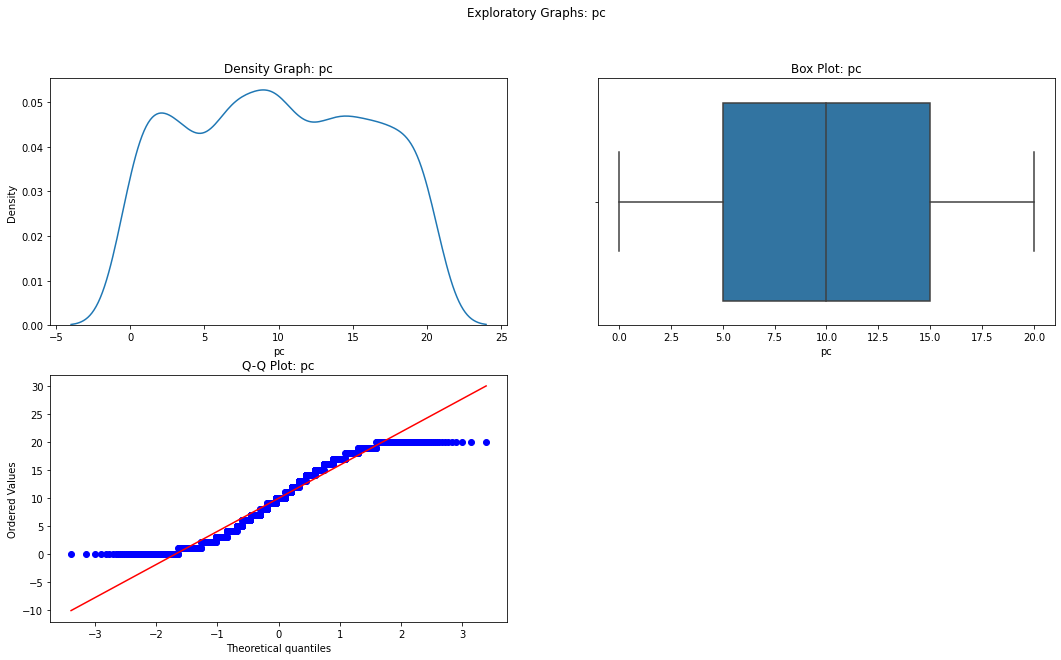

In [34]:
exploration()

In [ ]:
# Analyses - Pc - primary camera megapixles

# No missing values. 
# No outliers 
# close to a normal distribution


All variables:

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Which variable do you want to analyse? px_height

count    2000.000000
mean      645.108000
std       443.780811
min         0.000000
25%       282.750000
50%       564.000000
75%       947.250000
max      1960.000000
Name: px_height, dtype: float64

No missing values

Skew: 0.6662712560691598

Moderate skew positive



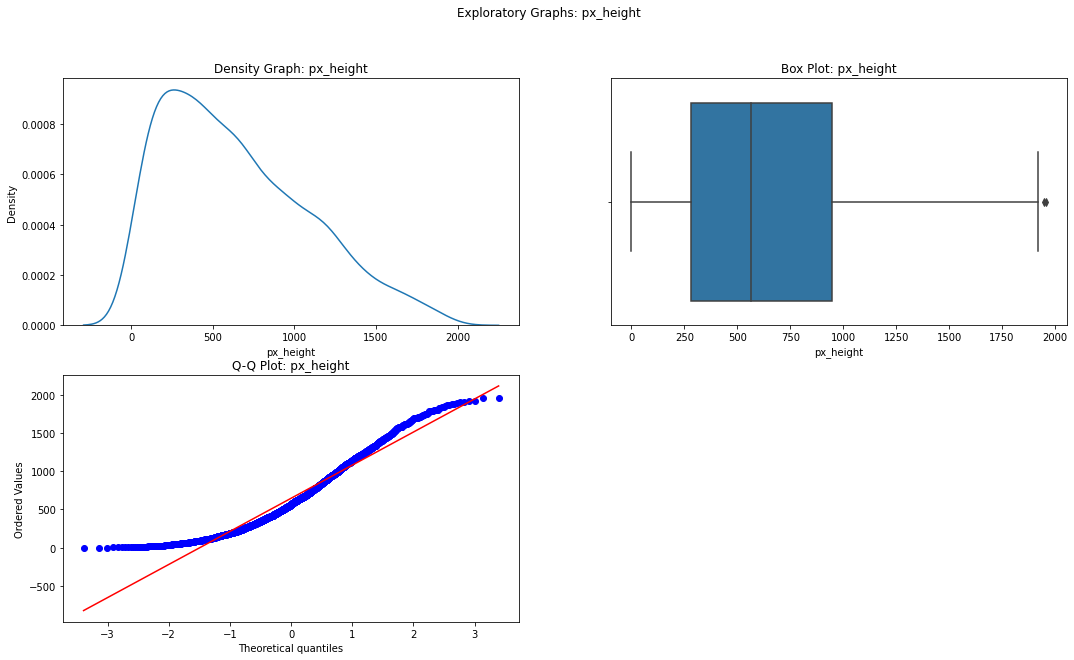

In [35]:
exploration()

In [ ]:
# Analyses - Px height 

# No missing values. 
# positive skew distriubtion. presence of outliers to the right side. mean greater than median
# May require transformation. 


All variables:

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Which variable do you want to analyse? px_width

count    2000.000000
mean     1251.515500
std       432.199447
min       500.000000
25%       874.750000
50%      1247.000000
75%      1633.000000
max      1998.000000
Name: px_width, dtype: float64

No missing values

Skew: 0.014787473768006081

Normal distribution



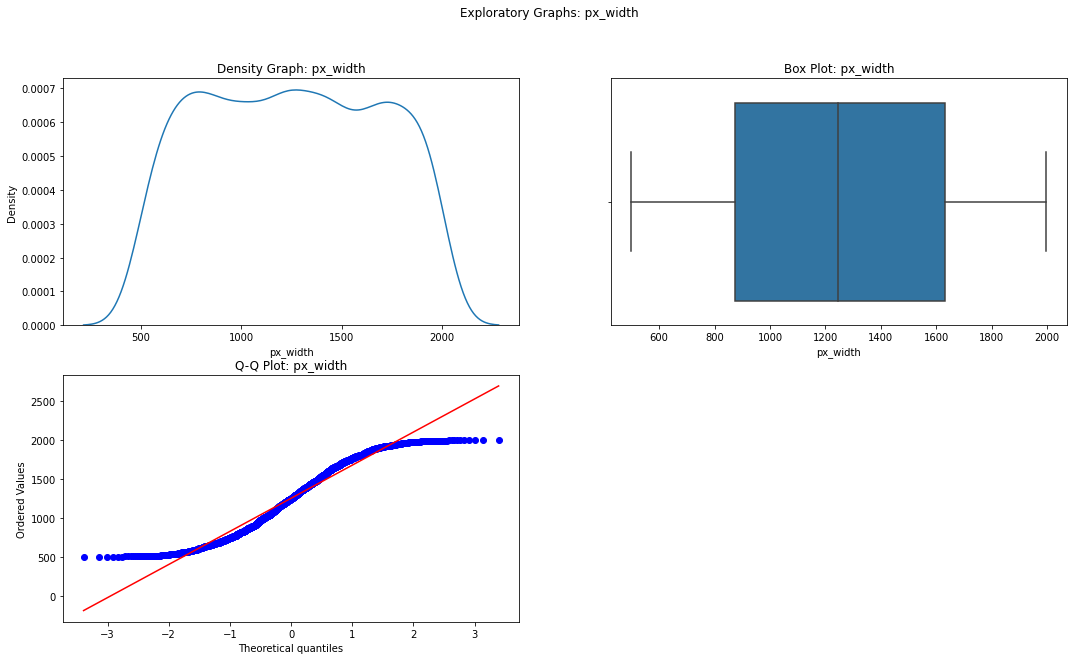

In [36]:
exploration()

In [ ]:
# Analyses - Px width

# No missing values. 
# No outliers 
# close to a normal distribution


All variables:

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Which variable do you want to analyse? ram

count    2000.000000
mean     2124.213000
std      1084.732044
min       256.000000
25%      1207.500000
50%      2146.500000
75%      3064.500000
max      3998.000000
Name: ram, dtype: float64

No missing values

Skew: 0.006628035398750348

Normal distribution



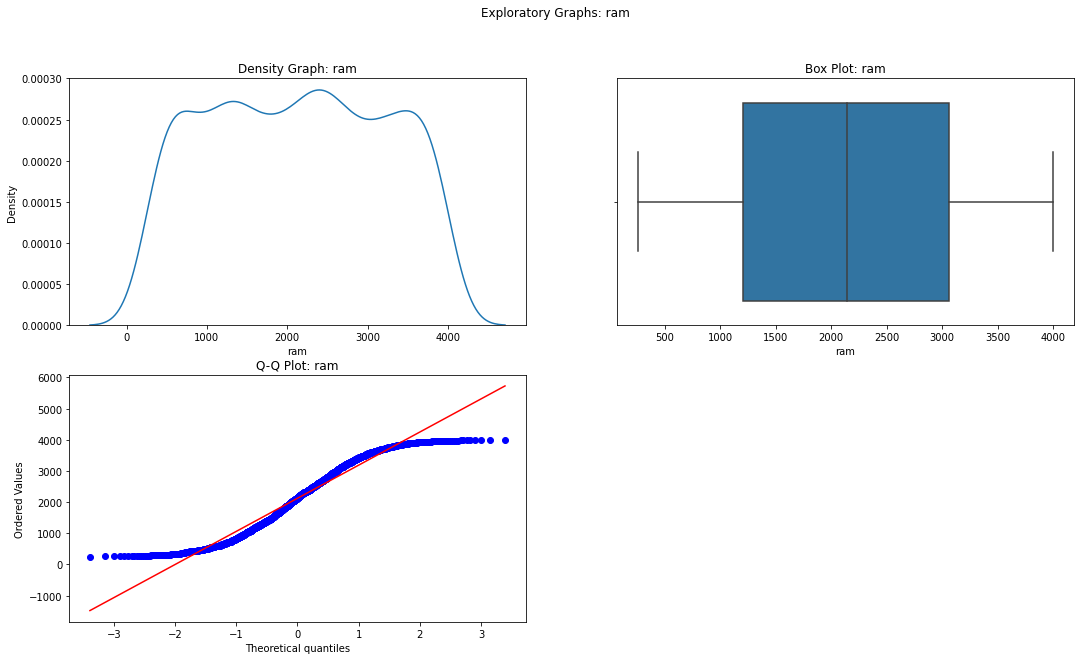

In [37]:
exploration()

In [ ]:
# Analyses - ram

# No missing values. 
# No outliers 
# close to a normal distribution


All variables:

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Which variable do you want to analyse? sc_h

count    2000.000000
mean       12.306500
std         4.213245
min         5.000000
25%         9.000000
50%        12.000000
75%        16.000000
max        19.000000
Name: sc_h, dtype: float64

No missing values

Skew: -0.09888424098283438

Normal distribution



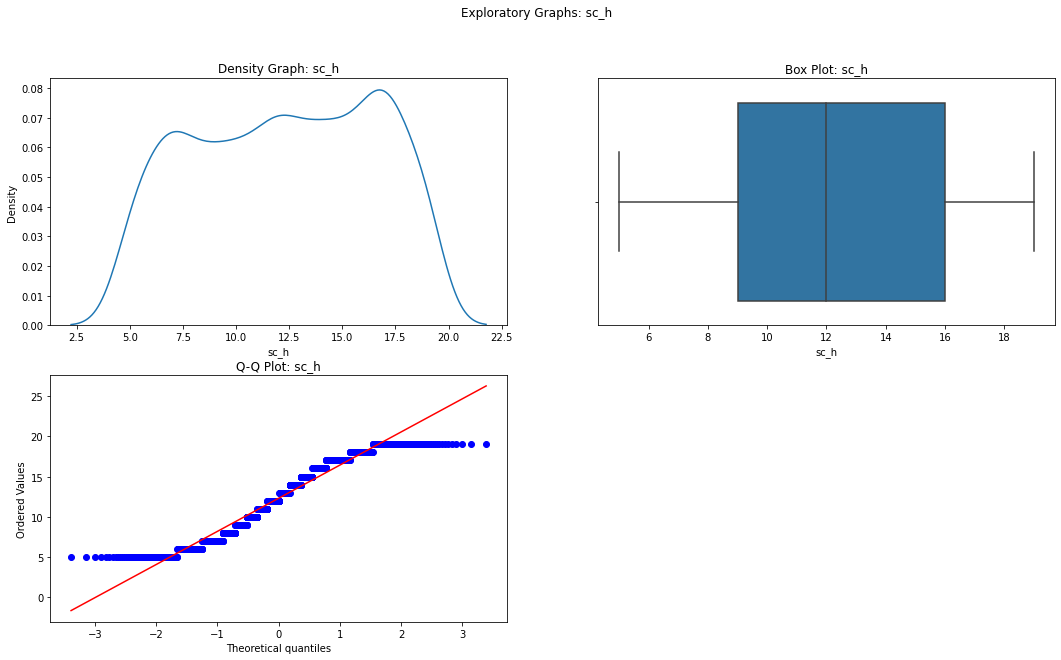

In [38]:
exploration()

In [ ]:
# Analyses - screen height

# No missing values. 
# No outliers 
# close to a normal distribution


All variables:

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Which variable do you want to analyse? sc_w

count    2000.000000
mean        5.767000
std         4.356398
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        18.000000
Name: sc_w, dtype: float64

No missing values

Skew: 0.6337870734456067

Moderate skew positive



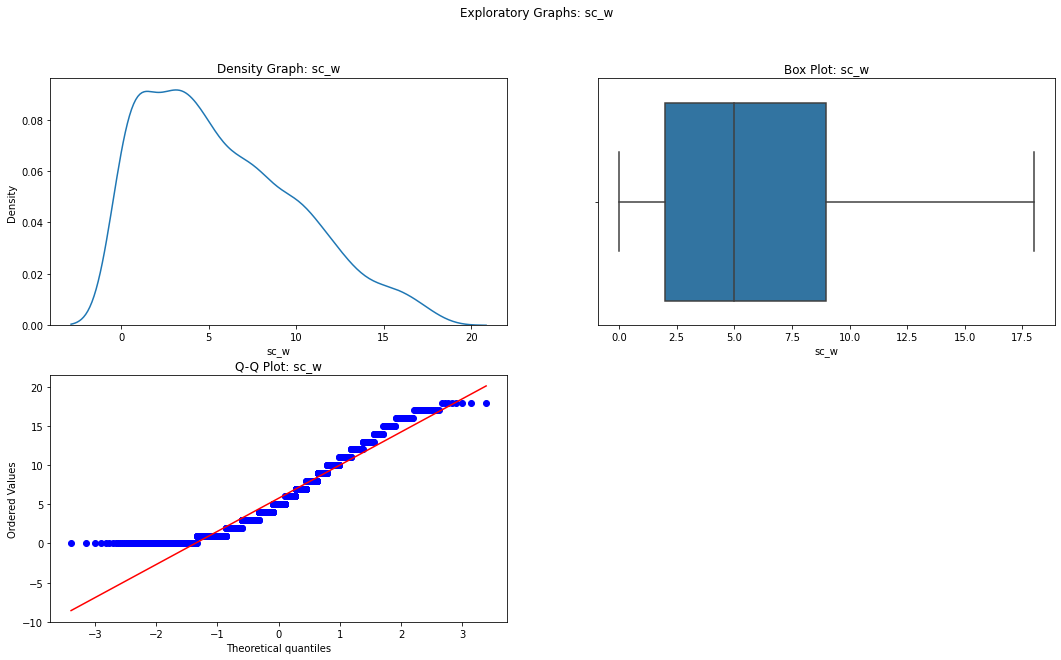

In [39]:
exploration()

In [ ]:
# Analyses - screen width

# No missing values. 
# No outliers however positive skew.
# May require transormation


All variables:

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Which variable do you want to analyse? talk_time

count    2000.000000
mean       11.011000
std         5.463955
min         2.000000
25%         6.000000
50%        11.000000
75%        16.000000
max        20.000000
Name: talk_time, dtype: float64

No missing values

Skew: 0.009511762221541457

Normal distribution



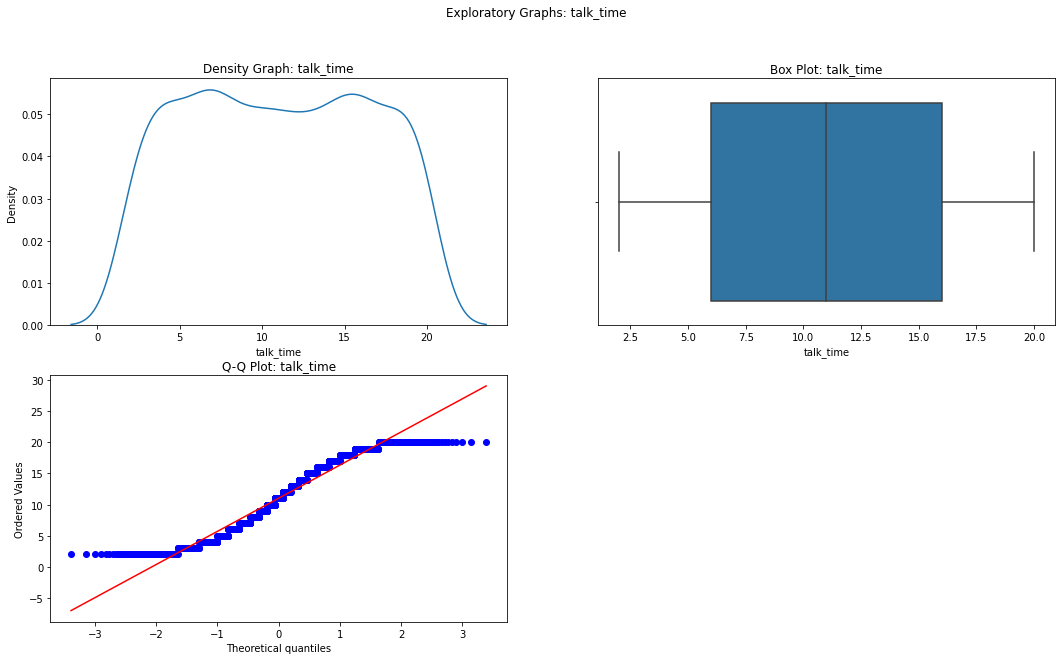

In [40]:
exploration()

In [ ]:
# Analyses - talk time

# No missing values. 
# No outliers 
# close to a normal distribution


All variables:

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Which variable do you want to analyse? three_g

count    2000.000000
mean        0.761500
std         0.426273
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: three_g, dtype: float64

No missing values

Skew: -1.2281416344153246

Extreme skew negative



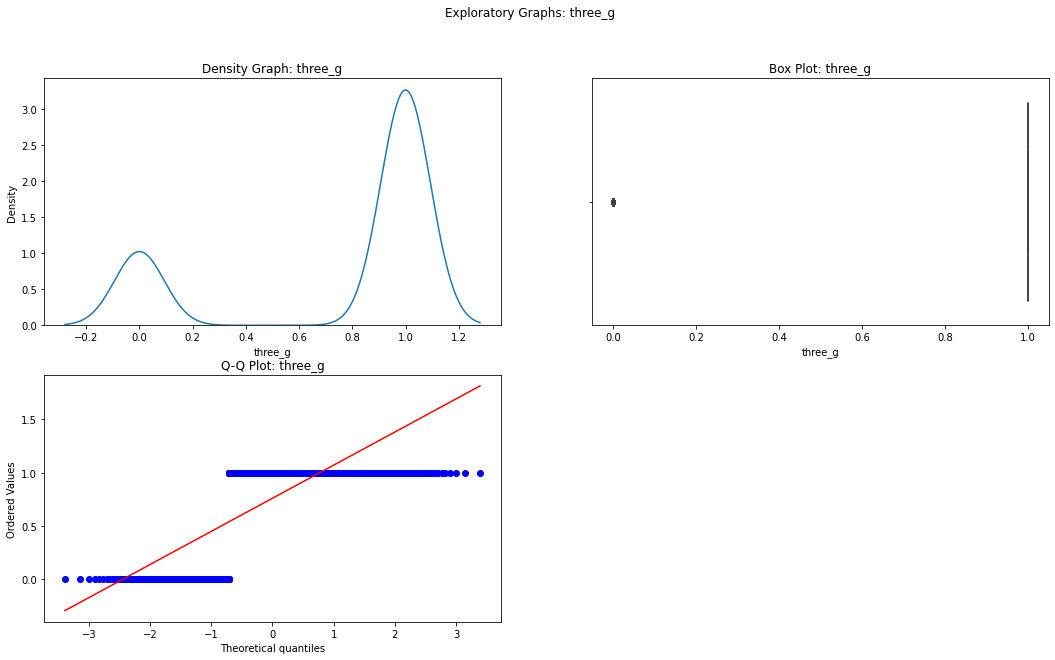

In [41]:
exploration()

In [ ]:
# Analyses - three g

# binary variable
# No missing values. 
# outlirs to the left
# may require transformation


All variables:

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Which variable do you want to analyse? touch_screen

count    2000.000000
mean        0.503000
std         0.500116
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: touch_screen, dtype: float64

No missing values

Skew: -0.012009224801531652

Normal distribution



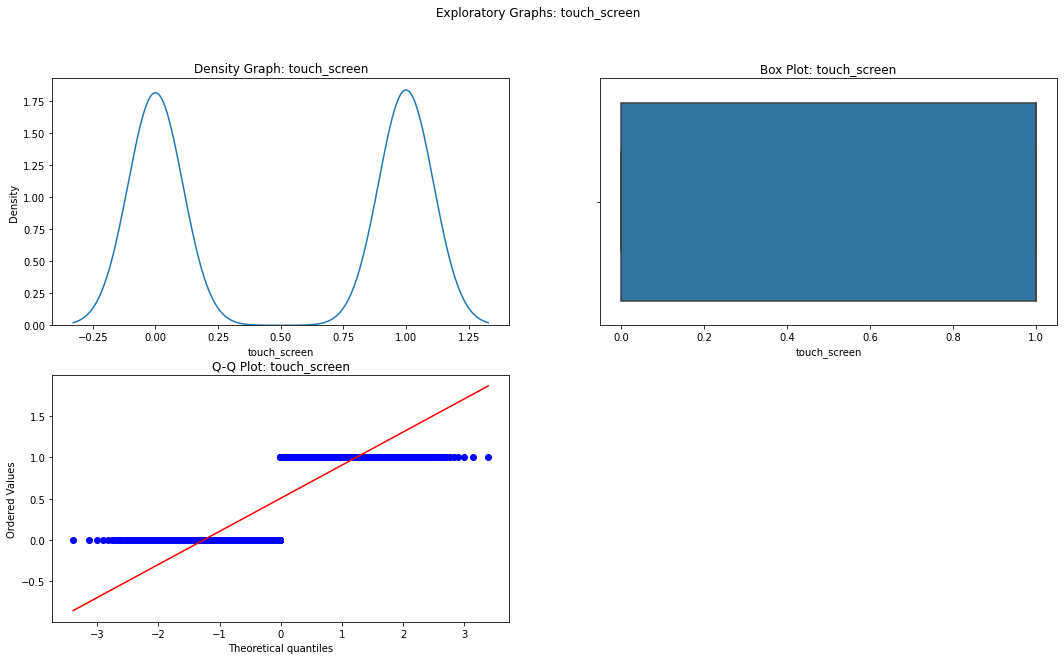

In [42]:
exploration()

In [ ]:
# Analyses - touch screen

# No missing values. 
# No outliers 
# close to a normal distribution


All variables:

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Which variable do you want to analyse? wifi

count    2000.000000
mean        0.507000
std         0.500076
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: wifi, dtype: float64

No missing values

Skew: -0.028023766608637157

Normal distribution



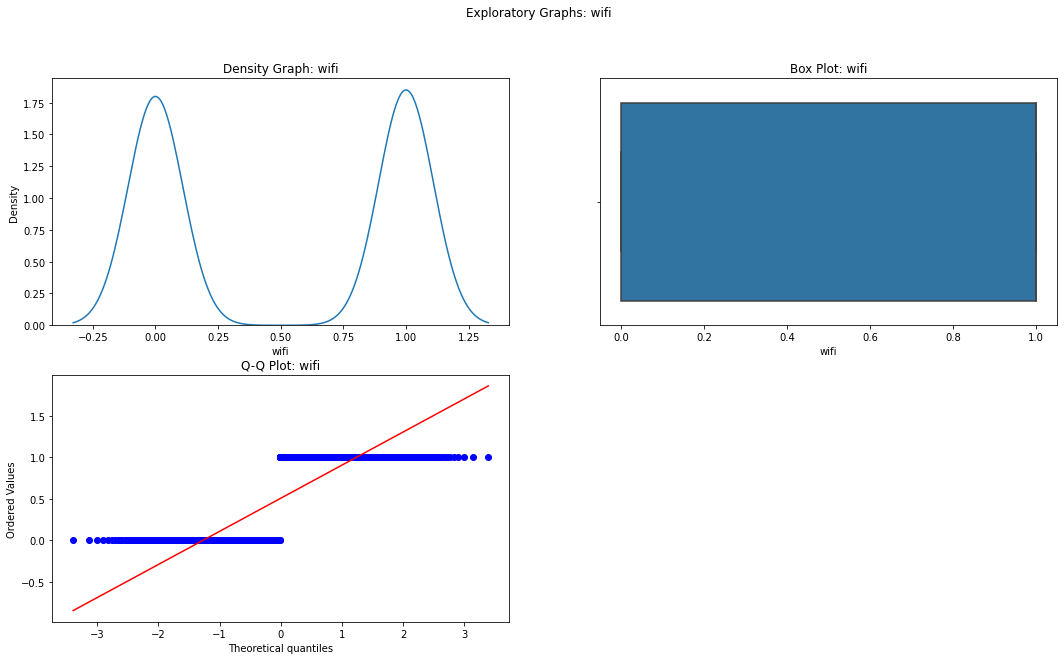

In [43]:
exploration()

In [ ]:
# Analyses - wifi

# No missing values. 
# No outliers 
# close to a normal distribution


All variables:

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

Which variable do you want to analyse? price_range

count    2000.000000
mean        1.500000
std         1.118314
min         0.000000
25%         0.750000
50%         1.500000
75%         2.250000
max         3.000000
Name: price_range, dtype: float64

No missing values

Skew: 0.0

Normal distribution



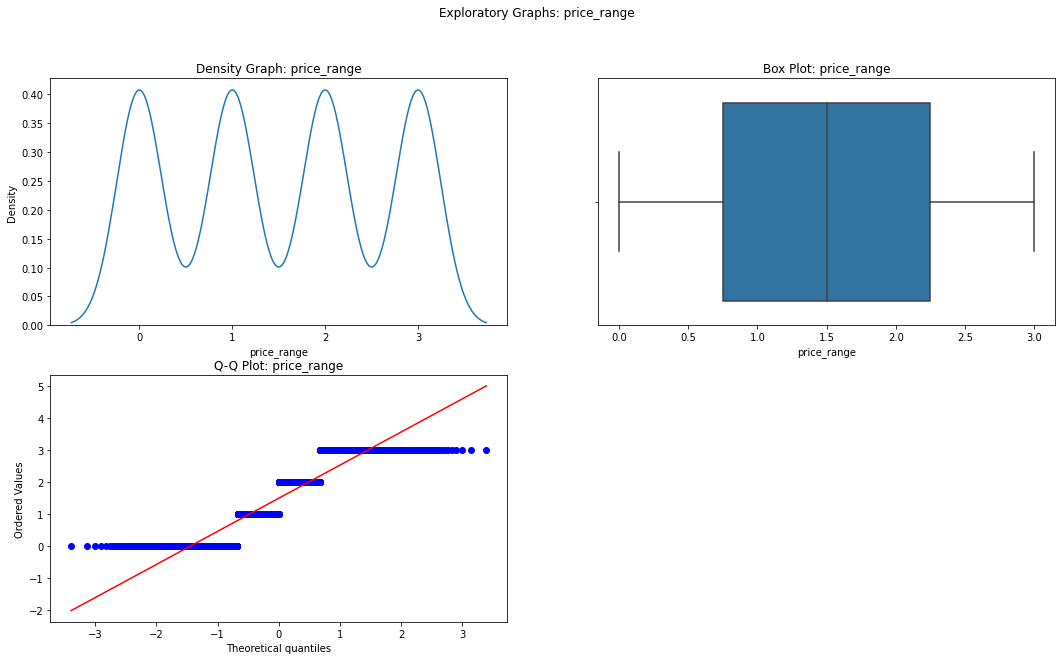

In [44]:
exploration()

In [ ]:
# Analyses - price range 

# Target variable. 
# multi ordenal variable 
# 0 - 4 
# 4 more expensive
# 0 less expensive

In [ ]:
# conclusion

# 4 variables tienen a non normal distribution

# FC, Px Height, Sc-w, 3g

# They will be transformed to get the distribution more normal. 

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [68]:
def transformations(data = train, variable = 'fc'):
  log = np.log(data[variable]+1)
  cube = np.cbrt(data[variable])
  sqrt = np.sqrt(data[variable])
  exponential = data[variable]**(1/1.2)


  df_tran = pd.DataFrame(data = {'log' : log,
                                 'cube' : cube,
                                 'sqrt' : sqrt,
                                 'exponential': exponential})
  

  
  print('Transformaciones ' +str(variable))
  print()
  print('skew original', data[variable].skew())
  print()
  print('log skew: ', df_tran['log'].skew())
  print()
  print('cube skew: ', df_tran['cube'].skew())
  print()
  print('sqrt skew: ', df_tran['sqrt'].skew())
  print()
  print('exponential skew: ', df_tran['exponential'].skew())

  return

In [70]:
transformations(data = train, variable = 'fc') # best transformation is sqrt. 

Transformaciones fc

skew original 1.0198114105315519

log skew:  -0.11865185040650801

cube skew:  -0.4776588109961098

sqrt skew:  0.013144904200097396

exponential skew:  0.7407704525104367


In [73]:
train['fc_sqrt'] = np.sqrt(train['fc'])


In [69]:
transformations(data = train, variable = 'px_height') # best transformation is sqrt. 

Transformaciones px_height

skew original 0.6662712560691598

log skew:  -1.5137681380444556

cube skew:  -0.40230010220962076

sqrt skew:  -0.05475099935504426

exponential skew:  0.45429872485833483


In [74]:
train['px_height_sqrt'] = np.sqrt(train['px_height'])


In [71]:
transformations(data = train, variable = 'sc_w') # best transformation is exponential. 

Transformaciones sc_w

skew original 0.6337870734456067

log skew:  -0.6033861260889911

cube skew:  -1.0566016296055334

sqrt skew:  -0.3664011053870454

exponential skew:  0.3825875635841285


In [75]:
train['sc_w_exponential'] = train['sc_w']**(1/1.2)


In [72]:
transformations(data = train, variable = 'three_g') # no good transformations here. Variable will not be transformed. 

Transformaciones three_g

skew original -1.2281416344153246

log skew:  -1.2281416344153258

cube skew:  -1.2281416344153246

sqrt skew:  -1.2281416344153246

exponential skew:  -1.2281416344153246


## Model

In [125]:
train['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [129]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 
import time


In [127]:
X = train.drop(['price_range'],axis =1)
y = train['price_range']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25, random_state=123, stratify = y)

### Model 1 - Decision Tree

In [ ]:
# We can get an initial quick idea of the predictive power within the data by training a decision tree. 
# It is highly susceptible to variance error however, it will give an initial indicaiton as to if the data 
# has some capability for predicting the target variable. # We will use a max depth of five to avoid overfitting.

In [132]:
start = time.time()
DTclf = DecisionTreeClassifier(criterion = 'gini', max_depth=5, random_state = 123)
print(DTclf.fit(X_train, y_train))
print()
stop = time.time()
print(f"Training time: {stop - start}s")

DecisionTreeClassifier(max_depth=5, random_state=123)

Training time: 0.055446624755859375s


In [191]:
from sklearn.model_selection import cross_validate

pd.DataFrame(cross_validate(DTclf, X_train, y_train, scoring = scoring, cv=5))

,fit_time,score_time,test_f1_macro,test_f1_micro,test_f1_weighted
0,0.015,0.008,0.821,0.823,0.821
1,0.014,0.007,0.820,0.820,0.820
2,0.014,0.007,0.819,0.820,0.819
3,0.013,0.007,0.826,0.823,0.826
4,0.013,0.007,0.819,0.817,0.819


In [189]:
from sklearn.metrics import make_scorer

scoring = {
    'f1_macro' : make_scorer(f1_score, average = 'macro'),
    'f1_micro' : make_scorer(f1_score, average = 'micro'),
    'f1_weighted' : make_scorer(f1_score, average = 'weighted')
    
}

In [226]:
from IPython.display import display
from sklearn.model_selection import cross_validate

def evaluation(model = DTclf, X_train = X_train, y_train = y_train, X_val = X_val, y_val = y_val):
  cv_scores = pd.DataFrame(cross_validate(model, X_train, y_train, scoring = scoring, cv=5))  
  print('Cross Validation Scores')
  display(cv_scores[['test_f1_macro', 	'test_f1_micro', 	'test_f1_weighted']])
  print()
  print('Classification Report')
  y_val_pred = model.predict(X_val)
  report = pd.DataFrame(classification_report(y_val, y_val_pred, labels = [0,1,2,3], output_dict=True)).rename({'accuracy' : 'micro/accuracy'}, axis =1).rename({'support': 'n_observations'}, axis =0)
  display(report)
  precisions = report.iloc[0,0:4]
  recalls = report.iloc[1,0:4]
  f1s = report.iloc[2,0:4]
  precision_macro = report.iloc[0,5]
  recall_macro = report.iloc[1,5]
  f1_macro = report.iloc[2,5]
  print()

  print('Precision macro avg: ', round(precision_macro,3),', with std of: ', round(np.std(precisions),3))
  print('Recall macro avg: ', round(recall_macro,3),', with std of: ', round(np.std(recalls),3))
  print('F1 macro avg: ', round(f1_macro,3),', with std of: ', round(np.std(f1s),3))
  print('F1 cross validation macro avg', round(np.mean(cv_scores['test_f1_macro']),3), 'with a std of', round(np.std(cv_scores['test_f1_macro']),3))
  print()
  print('Confision Matrix: ' + str(model))
  # Creating  a confusion matrix,which compares the y_test and y_pre
  cm = confusion_matrix(y_val, y_val_pred)
  
  # Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting
  
  cm_df = pd.DataFrame(cm,
                     index = ['0','1','2','3'], 
                     columns = ['0','1','2', '3'])

  #Plotting the confusion matrix
  plt.figure(figsize=(10,10))
  sns.heatmap(cm_df, annot=True, fmt='g')
  plt.title('Confusion Matrix')
  plt.ylabel('Actal Values')
  plt.xlabel('Predicted Values')
  plt.show()



  



Cross Validation Scores


,test_f1_macro,test_f1_micro,test_f1_weighted
0,0.821,0.823,0.821
1,0.820,0.820,0.820
2,0.819,0.820,0.819
3,0.826,0.823,0.826
4,0.819,0.817,0.819



Classification Report


,0,1,2,3,micro/accuracy,macro avg,weighted avg
precision,0.899,0.731,0.748,0.900,0.816,0.820,0.820
recall,0.856,0.784,0.760,0.864,0.816,0.816,0.816
f1-score,0.877,0.757,0.754,0.882,0.816,0.817,0.817
n_observations,125.000,125.000,125.000,125.000,0.816,500.000,500.000



Precision macro avg:  0.82 , with std of:  0.08
Recall macro avg:  0.816 , with std of:  0.045
F1 macro avg:  0.817 , with std of:  0.062
F1 cross validation macro avg 0.821 with a std of 0.003

Confision Matrix: DecisionTreeClassifier(max_depth=5, random_state=123)


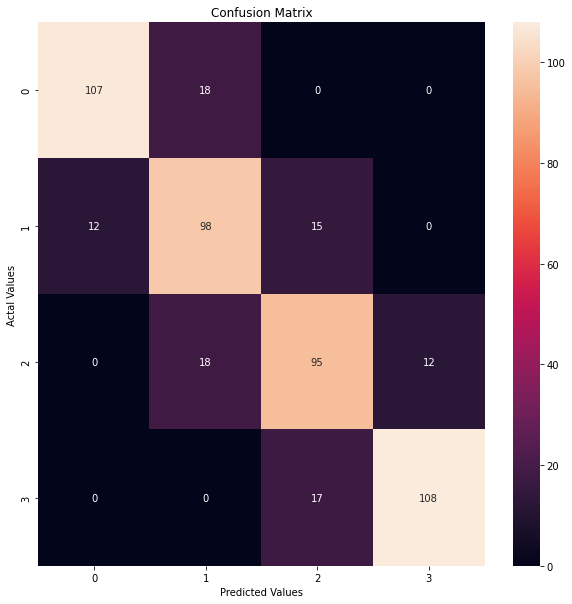

In [197]:
evaluation()

In [ ]:
# Analyses 

# We dont have an imbalance of classes with 125 for each class. 
# Therefore the macro metric can be considered appropriate providing the standard deviation is not high. 

# Using the macro with special focus on f1 (we want to reduce false negatives and false positives in this business case) we can see that the modelo 
# performs well with an f1 macro av of 0.817 across the four classes with a lowish std maintained (0.062). 

# The cross validation scores are similar with an f1 macro av of 0.821 (std 0.003). 

# These reuslts suggest that the data in our model has good predictive power as even with a basic decision tree we have managed to get a high score on the 
# validation unseen data, whilst also maintaining a similarly high score with the CV. 

# In the next section we will see if results can be improved using boosting and bagging methods. 

### Model 2 - Ensemble Bagging Random Forest

In [ ]:
# As mentioned above the decision tree can be susceptible to high variance error. 
# Although this doesnt seem to be the case for our tree, we will see if bagging can improve our models accuracy. 

In [227]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()
rfcl = RandomForestClassifier(max_depth = 3, max_features = 'sqrt', max_samples = 0.4, random_state=123)
print(rfcl.fit(X_train, y_train))
stop = time.time()
print(f"Training time: {stop - start}s")

RandomForestClassifier(max_depth=3, max_features='sqrt', max_samples=0.4,
                       random_state=123)
Training time: 0.18993759155273438s


Cross Validation Scores


,test_f1_macro,test_f1_micro,test_f1_weighted
0,0.744,0.757,0.744
1,0.782,0.790,0.782
2,0.787,0.800,0.787
3,0.789,0.793,0.789
4,0.799,0.803,0.799



Classification Report


,0,1,2,3,micro/accuracy,macro avg,weighted avg
precision,0.811,0.686,0.780,0.850,0.786,0.782,0.782
recall,0.960,0.664,0.568,0.952,0.786,0.786,0.786
f1-score,0.879,0.675,0.657,0.898,0.786,0.777,0.777
n_observations,125.000,125.000,125.000,125.000,0.786,500.000,500.000



Precision macro avg:  0.782 , with std of:  0.061
Recall macro avg:  0.786 , with std of:  0.173
F1 macro avg:  0.777 , with std of:  0.112
F1 cross validation macro avg 0.78 with a std of 0.019

Confision Matrix: RandomForestClassifier(max_depth=3, max_features='sqrt', max_samples=0.4,
                       random_state=123)


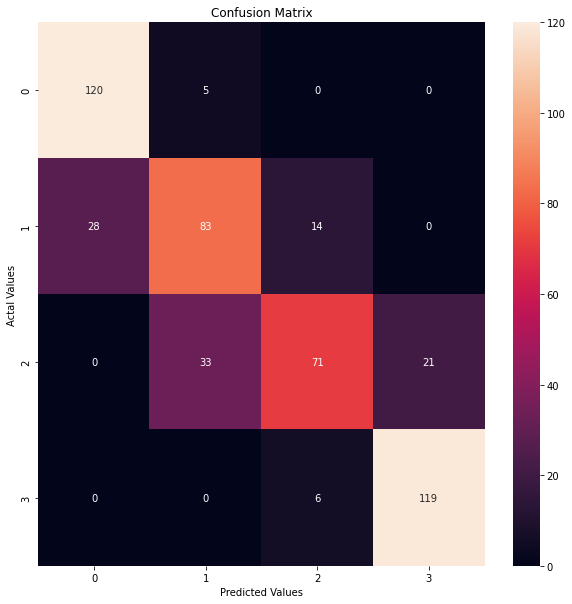

In [228]:
evaluation(model = rfcl)

In [ ]:
# Analyses 
# The lower scores when predicitng for both the validation group (F1 macro avg:  0.777) and the cross validation f1 macro avg of 0.78
# suggest that our modelo is suffering from bias. It is not complex enough to capture the patterns in the data with this resulting is a reduced f1 macro avg when tested on the validation group.
# the max depth of 3 and max samples 0.4 could explain this. 
# Now we will try to optimise the max depth and max samples using a validation curve. 

,train_score,val_score,max_depth_value
0,0.857,0.780,3
1,0.927,0.818,5
2,0.971,0.839,7
3,0.990,0.850,9


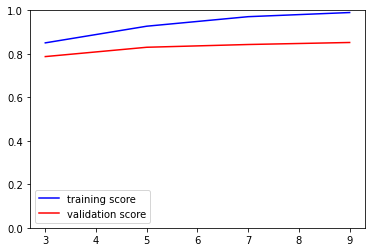

In [204]:
from sklearn.model_selection import validation_curve

max_depth = [3, 5, 7, 9] 
train_score, val_score = validation_curve(RandomForestClassifier(max_features = 'sqrt', max_samples = 0.4, random_state = 123), X_train, y_train, param_name = 'max_depth', param_range = max_depth, scoring = 'f1_macro', cv=5)

plt.plot(max_depth, np.median(train_score, 1), color='blue', label='training score')
plt.plot(max_depth, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1) 

t = pd.DataFrame(train_score.mean(axis=1)).rename(columns = {0 : 'train_score'})
v = pd.DataFrame(val_score.mean(axis=1)).rename(columns = {0 : 'val_score'})
g = pd.DataFrame(max_depth).rename(columns = {0 : 'max_depth_value'})
pd.concat([t,v, g], axis =1)

In [ ]:
# There is a big gap between the validation score and the training score. 
# This could suggest that not enough data is being made available to properly learn the trends of the data. 
# Thus when tested against the validation data the score doesnt increase as hoped. 
# We will keep the max depth as five and try and optimise the max_samples value. 

,train_score,train_score_std,val_score,val_score_std,max_samples_value
0,0.927,0.008,0.818,0.022,0.400
1,0.928,0.010,0.831,0.015,0.500
2,0.929,0.007,0.822,0.014,0.600
3,0.930,0.005,0.820,0.019,0.700
4,0.934,0.008,0.831,0.016,0.800
5,0.930,0.009,0.831,0.013,0.900


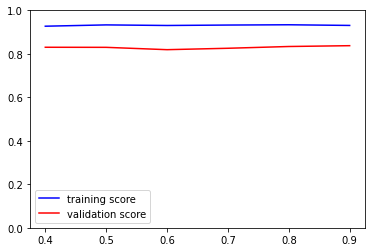

In [209]:
from sklearn.model_selection import validation_curve

max_samples = [0.4, 0.5, 0.6,0.7, 0.8, 0.9] 
train_score, val_score = validation_curve(RandomForestClassifier(max_features = 'sqrt', max_depth = 5, random_state = 123), X_train, y_train, 
                                          param_name = 'max_samples', param_range = max_samples, scoring = 'f1_macro', cv=5)

plt.plot(max_samples, np.median(train_score, 1), color='blue', label='training score')
plt.plot(max_samples, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1) 

t = pd.DataFrame(train_score.mean(axis=1)).rename(columns = {0 : 'train_score'})
ts = pd.DataFrame(train_score.std(axis=1)).rename(columns = {0 : 'train_score_std'})
v = pd.DataFrame(val_score.mean(axis=1)).rename(columns = {0 : 'val_score'})
vs = pd.DataFrame(val_score.std(axis=1)).rename(columns = {0 : 'val_score_std'})
g = pd.DataFrame(max_samples).rename(columns = {0 : 'max_samples_value'})

pd.concat([t, ts, v, vs, g], axis =1)

In [ ]:
# The max_samples value doesnt improve the validation score. 
# We will try max_features to see if this improves the model. 

In [212]:
np.sqrt(X_train.shape[1])

4.795831523312719

,train_score,train_score_std,val_score,val_score_std,max_features_value
0,0.930,0.005,0.820,0.019,sqrt
1,0.935,0.007,0.874,0.009,0.400
2,0.934,0.007,0.873,0.010,0.500
3,0.933,0.007,0.870,0.008,0.600
4,0.926,0.008,0.863,0.011,0.700
5,0.931,0.004,0.872,0.008,0.800
6,0.928,0.005,0.866,0.006,0.900


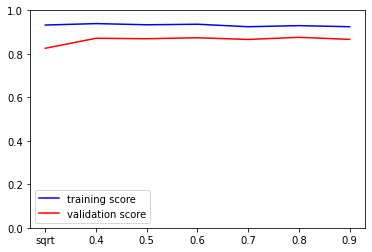

In [214]:
from sklearn.model_selection import validation_curve

max_features = ['sqrt',0.4, 0.5, 0.6,0.7, 0.8, 0.9] 
train_score, val_score = validation_curve(RandomForestClassifier(max_samples = 0.7, max_depth = 5, random_state = 123), X_train, y_train, 
                                          param_name = 'max_features', param_range = max_features, scoring = 'f1_macro', cv=5)

plt.plot(max_features, np.median(train_score, 1), color='blue', label='training score')
plt.plot(max_features, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1) 

t = pd.DataFrame(train_score.mean(axis=1)).rename(columns = {0 : 'train_score'})
ts = pd.DataFrame(train_score.std(axis=1)).rename(columns = {0 : 'train_score_std'})
v = pd.DataFrame(val_score.mean(axis=1)).rename(columns = {0 : 'val_score'})
vs = pd.DataFrame(val_score.std(axis=1)).rename(columns = {0 : 'val_score_std'})
g = pd.DataFrame(max_features).rename(columns = {0 : 'max_features_value'})

pd.concat([t, ts, v, vs, g], axis =1)

In [ ]:
# Max features at 0.4 causes an increase in val_score to 0.874. 
# lets see if increasing the max samples slightly to 0.8 will improve it still more? 

,train_score,train_score_std,val_score,val_score_std,max_features_value
0,0.934,0.008,0.831,0.016,sqrt
1,0.936,0.006,0.868,0.008,0.400
2,0.934,0.007,0.872,0.010,0.500
3,0.935,0.007,0.870,0.007,0.600
4,0.928,0.004,0.866,0.008,0.700
5,0.931,0.003,0.870,0.007,0.800
6,0.927,0.003,0.868,0.009,0.900


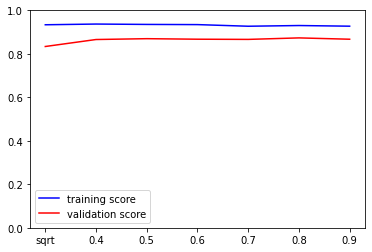

In [215]:
from sklearn.model_selection import validation_curve

max_features = ['sqrt',0.4, 0.5, 0.6,0.7, 0.8, 0.9] 
train_score, val_score = validation_curve(RandomForestClassifier(max_samples = 0.8, max_depth = 5, random_state = 123), X_train, y_train, 
                                          param_name = 'max_features', param_range = max_features, scoring = 'f1_macro', cv=5)

plt.plot(max_features, np.median(train_score, 1), color='blue', label='training score')
plt.plot(max_features, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1) 

t = pd.DataFrame(train_score.mean(axis=1)).rename(columns = {0 : 'train_score'})
ts = pd.DataFrame(train_score.std(axis=1)).rename(columns = {0 : 'train_score_std'})
v = pd.DataFrame(val_score.mean(axis=1)).rename(columns = {0 : 'val_score'})
vs = pd.DataFrame(val_score.std(axis=1)).rename(columns = {0 : 'val_score_std'})
g = pd.DataFrame(max_features).rename(columns = {0 : 'max_features_value'})

pd.concat([t, ts, v, vs, g], axis =1)

In [ ]:
# Changing the max_samples to 0.8 doesnt impact the val score. 
# lets see if changing the max depth to 7 helps?

,train_score,train_score_std,val_score,val_score_std,max_features_value
0,0.981,0.006,0.840,0.018,sqrt
1,0.978,0.006,0.890,0.008,0.400
2,0.977,0.004,0.889,0.008,0.500
3,0.980,0.002,0.891,0.007,0.600
4,0.979,0.004,0.889,0.013,0.700
5,0.981,0.003,0.896,0.013,0.800
6,0.980,0.002,0.893,0.014,0.900


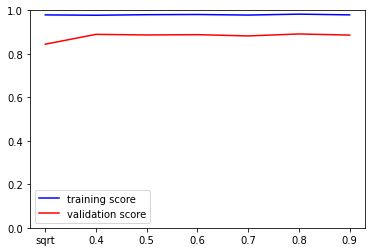

In [218]:
from sklearn.model_selection import validation_curve

max_features = ['sqrt',0.4, 0.5, 0.6,0.7, 0.8, 0.9] 
train_score, val_score = validation_curve(RandomForestClassifier(max_samples = 0.7, max_depth = 7, random_state = 123), X_train, y_train, 
                                          param_name = 'max_features', param_range = max_features, scoring = 'f1_macro', cv=5)

plt.plot(max_features, np.median(train_score, 1), color='blue', label='training score')
plt.plot(max_features, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1) 

t = pd.DataFrame(train_score.mean(axis=1)).rename(columns = {0 : 'train_score'})
ts = pd.DataFrame(train_score.std(axis=1)).rename(columns = {0 : 'train_score_std'})
v = pd.DataFrame(val_score.mean(axis=1)).rename(columns = {0 : 'val_score'})
vs = pd.DataFrame(val_score.std(axis=1)).rename(columns = {0 : 'val_score_std'})
g = pd.DataFrame(max_features).rename(columns = {0 : 'max_features_value'})

pd.concat([t, ts, v, vs, g], axis =1)

In [ ]:
# Changing the max depth to 7 does improve the val_score to 0.89 
# with a max features of between 0.40 - 0.60 seemingly better due to the lower std. 
# lets use grid search cv to optimise the max depth using a range of max features of 0.4 - 0.6 and a max samples of 0.7

In [220]:
from sklearn.model_selection import GridSearchCV

In [221]:
import time
start = time.time()

parameters = {'max_features':[0.4,0.5,0.6], 'max_depth':[6,7,8,9,11], 'max_samples':[0.7]}

rfcl_grid = GridSearchCV(RandomForestClassifier(random_state = 123), parameters, scoring = 'f1_macro', refit = False, cv = 5)

print(rfcl_grid.fit(X_train, y_train))
end = time.time()
train_time = end-start
print()
print('train time: ', train_time)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_depth': [6, 7, 8, 9, 11],
                         'max_features': [0.4, 0.5, 0.6],
                         'max_samples': [0.7]},
             refit=False, scoring='f1_macro')

train time:  29.3087477684021


In [ ]:
# cv_results_ para ver los resultados

In [223]:
pd.DataFrame(rfcl_grid.cv_results_)[['params', 'mean_test_score', 'std_test_score']].sort_values(by = 'mean_test_score', ascending = False)


,params,mean_test_score,std_test_score
14,"{'max_depth': 11, 'max_features': 0.6, 'max_sa...",0.899,0.008
9,"{'max_depth': 9, 'max_features': 0.4, 'max_sam...",0.897,0.005
11,"{'max_depth': 9, 'max_features': 0.6, 'max_sam...",0.897,0.015
8,"{'max_depth': 8, 'max_features': 0.6, 'max_sam...",0.897,0.007
13,"{'max_depth': 11, 'max_features': 0.5, 'max_sa...",0.896,0.007
10,"{'max_depth': 9, 'max_features': 0.5, 'max_sam...",0.894,0.009
6,"{'max_depth': 8, 'max_features': 0.4, 'max_sam...",0.892,0.009
7,"{'max_depth': 8, 'max_features': 0.5, 'max_sam...",0.892,0.014
5,"{'max_depth': 7, 'max_features': 0.6, 'max_sam...",0.891,0.007
3,"{'max_depth': 7, 'max_features': 0.4, 'max_sam...",0.890,0.008


In [ ]:
# model with parametros:

# {'max_depth': 11, 'max_features': 0.6, 'max_samples' = 0.7}

In [224]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()
rfcl_2 = RandomForestClassifier(max_depth = 11, max_features = 0.6, max_samples = 0.7, random_state=123)
print(rfcl_2.fit(X_train, y_train))
stop = time.time()
print(f"Training time: {stop - start}s")

RandomForestClassifier(max_depth=11, max_features=0.6, max_samples=0.7,
                       random_state=123)
Training time: 0.5355288982391357s


Cross Validation Scores


,test_f1_macro,test_f1_micro,test_f1_weighted
0,0.893,0.893,0.893
1,0.913,0.913,0.913
2,0.893,0.893,0.893
3,0.897,0.897,0.897
4,0.901,0.900,0.901



Classification Report


,0,1,2,3,micro/accuracy,macro avg,weighted avg
precision,0.924,0.868,0.833,0.974,0.898,0.900,0.900
recall,0.968,0.840,0.880,0.904,0.898,0.898,0.898
f1-score,0.945,0.854,0.856,0.938,0.898,0.898,0.898
n_observations,125.000,125.000,125.000,125.000,0.898,500.000,500.000



Precision macro avg:  0.9 , with std of:  0.054
Recall macro avg:  0.898 , with std of:  0.046
F1 macro avg:  0.898 , with std of:  0.043
F1 cross validation macro avg 0.899 with a std of 0.008

Confision Matrix: RandomForestClassifier(max_depth=11, max_features=0.6, max_samples=0.7,
                       random_state=123)


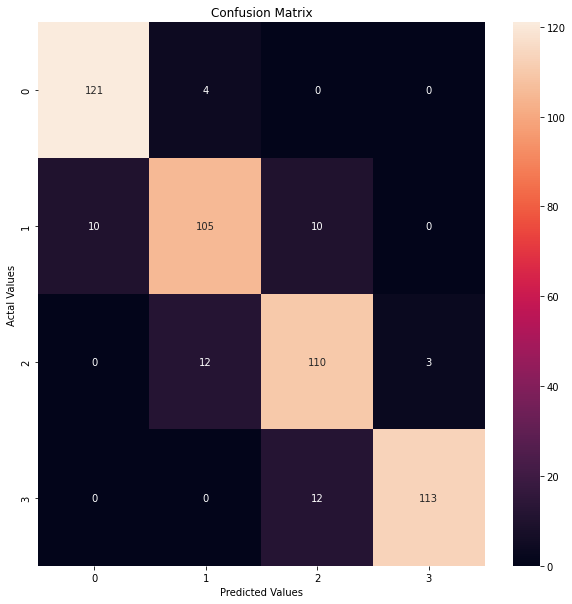

In [229]:
evaluation(model = rfcl_2)

In [ ]:
# The model has been improved with the F1 macro avg increasing to  0.898 when tested on the validation data.
# This stronger performance holds true for the cross validation with the training data with a f1 macro avg of 0.899. 
# lets try the other set of hyperparametros 

In [ ]:
# Model with paramtros: 

# {'max_depth': 9, 'max_features': 0.4, 'max_samples' = 0.7}

In [230]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()
rfcl_3 = RandomForestClassifier(max_depth = 9, max_features = 0.4, max_samples = 0.7, random_state=123)
print(rfcl_3.fit(X_train, y_train))
stop = time.time()
print(f"Training time: {stop - start}s")

RandomForestClassifier(max_depth=9, max_features=0.4, max_samples=0.7,
                       random_state=123)
Training time: 0.4184682369232178s


Cross Validation Scores


,test_f1_macro,test_f1_micro,test_f1_weighted
0,0.893,0.893,0.893
1,0.896,0.897,0.896
2,0.893,0.893,0.893
3,0.897,0.897,0.897
4,0.907,0.907,0.907



Classification Report


,0,1,2,3,micro/accuracy,macro avg,weighted avg
precision,0.916,0.851,0.817,0.957,0.884,0.885,0.885
recall,0.960,0.824,0.856,0.896,0.884,0.884,0.884
f1-score,0.938,0.837,0.836,0.926,0.884,0.884,0.884
n_observations,125.000,125.000,125.000,125.000,0.884,500.000,500.000



Precision macro avg:  0.885 , with std of:  0.055
Recall macro avg:  0.884 , with std of:  0.051
F1 macro avg:  0.884 , with std of:  0.048
F1 cross validation macro avg 0.897 with a std of 0.005

Confision Matrix: RandomForestClassifier(max_depth=9, max_features=0.4, max_samples=0.7,
                       random_state=123)


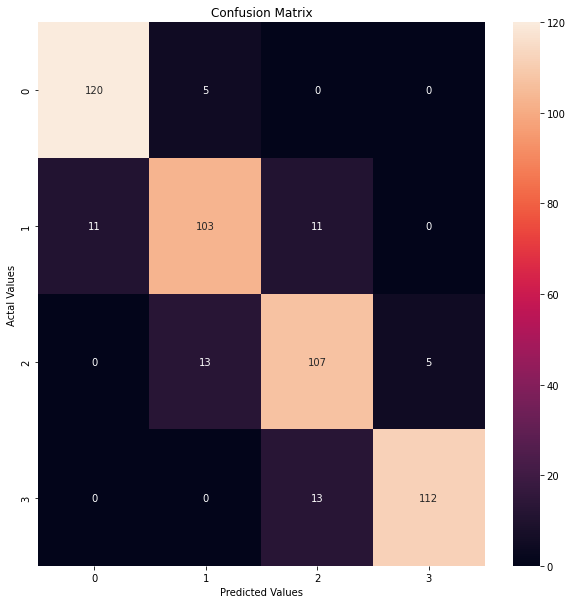

In [231]:
evaluation(model = rfcl_3)

In [ ]:
# When tested on the validation data this model doesnt perform as well as the previous model. 
# It achieves a lower f1 macro average of 0.884. The cross validation f1 macro avg remains high at 0.897. 
# The higher CV score suggests that there is more bais in this model with its reduced complexity 
# (max_depth = 9, max_features = 0.4, max_samples = 0.7 ) leading to a lower score when tested against the validation data 
# in comparison to the slightly more complex rfcl_2 ('max_depth': 11, 'max_features': 0.6, 'max_samples' = 0.7)

# Until now rfcl_2 is the choosen model. However, we will try ADABoost and XGBoost. 